# Import libraries and setup ultralytics

In [2]:
import os
os.chdir('/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets')
HOME = os.getcwd()

In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Setup complete ✅ (12 CPUs, 16.0 GB RAM, 535.6/926.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

# Import roboflow training dataset

In [6]:
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
#rf = Roboflow(api_key="YLaFkVsHQi1TZJOSm4Ub")
#project = rf.workspace("minoj-selvaraj").project("furniture-sfocl")
#dataset = project.version(1).download("yolov8")

[Errno 2] No such file or directory: '/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/datasets'
/Users/veesheenyuen/code/NwayEi/virtual_vision


# Train model

In [5]:
#%cd {HOME}

#!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=80 imgsz=800 plots=True

# Use locally downloaded dataset and nano model
!yolo task=detect mode=train model=yolov8n.pt data=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/data.yaml epochs=15 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/data.yaml, epochs=15, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/15         0G     0.1637     0.4921      1.021         11        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        460        460      0.934      0.926      0.977      0.975
                Female        460        237       0.95      0.903      0.977      0.977
                  Male        460        223      0.918      0.948      0.976      0.972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/15         0G     0.1355     0.4267      0.986         11        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        460        460      0.643      0.851       0.81      0.804
                Female        460        237      0.784      0.703       0.83      0.824
                  Male        460        223      0.503          1       

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml
events.out.tfevents.1679560583.MacBook-Pro-2.local.37659.0
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
weights


# Confusion matrix output

/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets


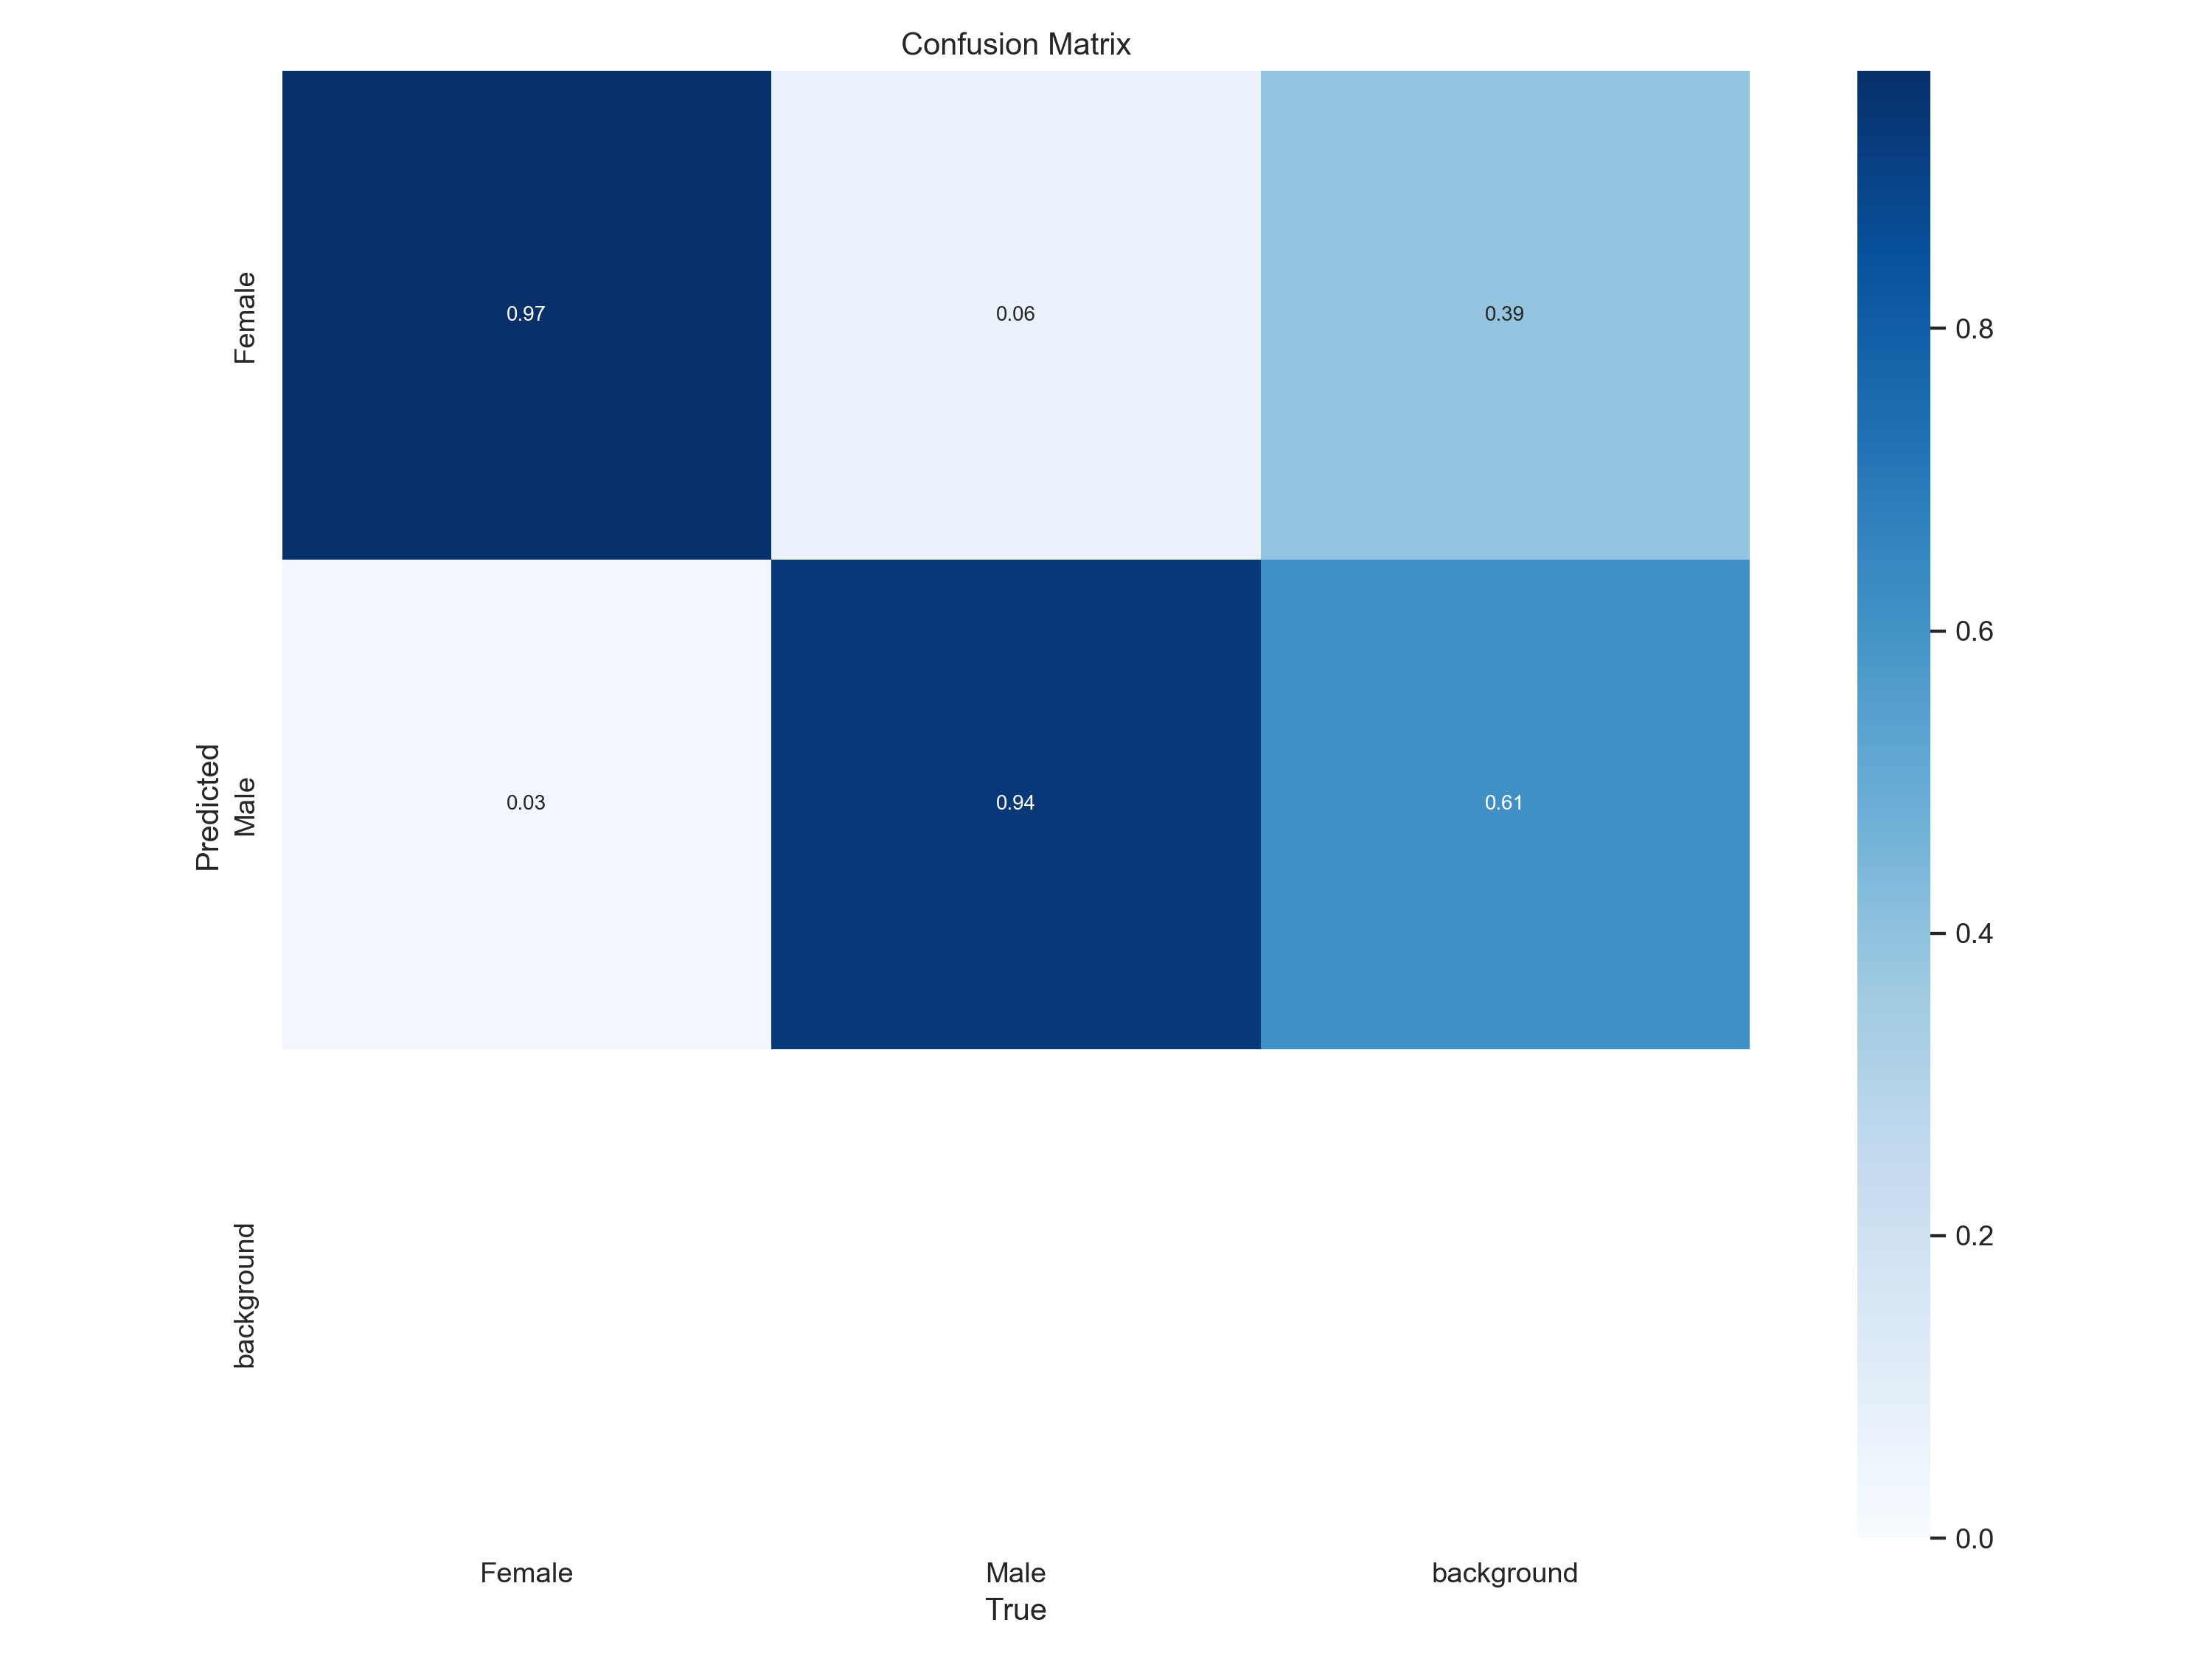

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

# Loss and mAP (mean average precision) graphs

/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets


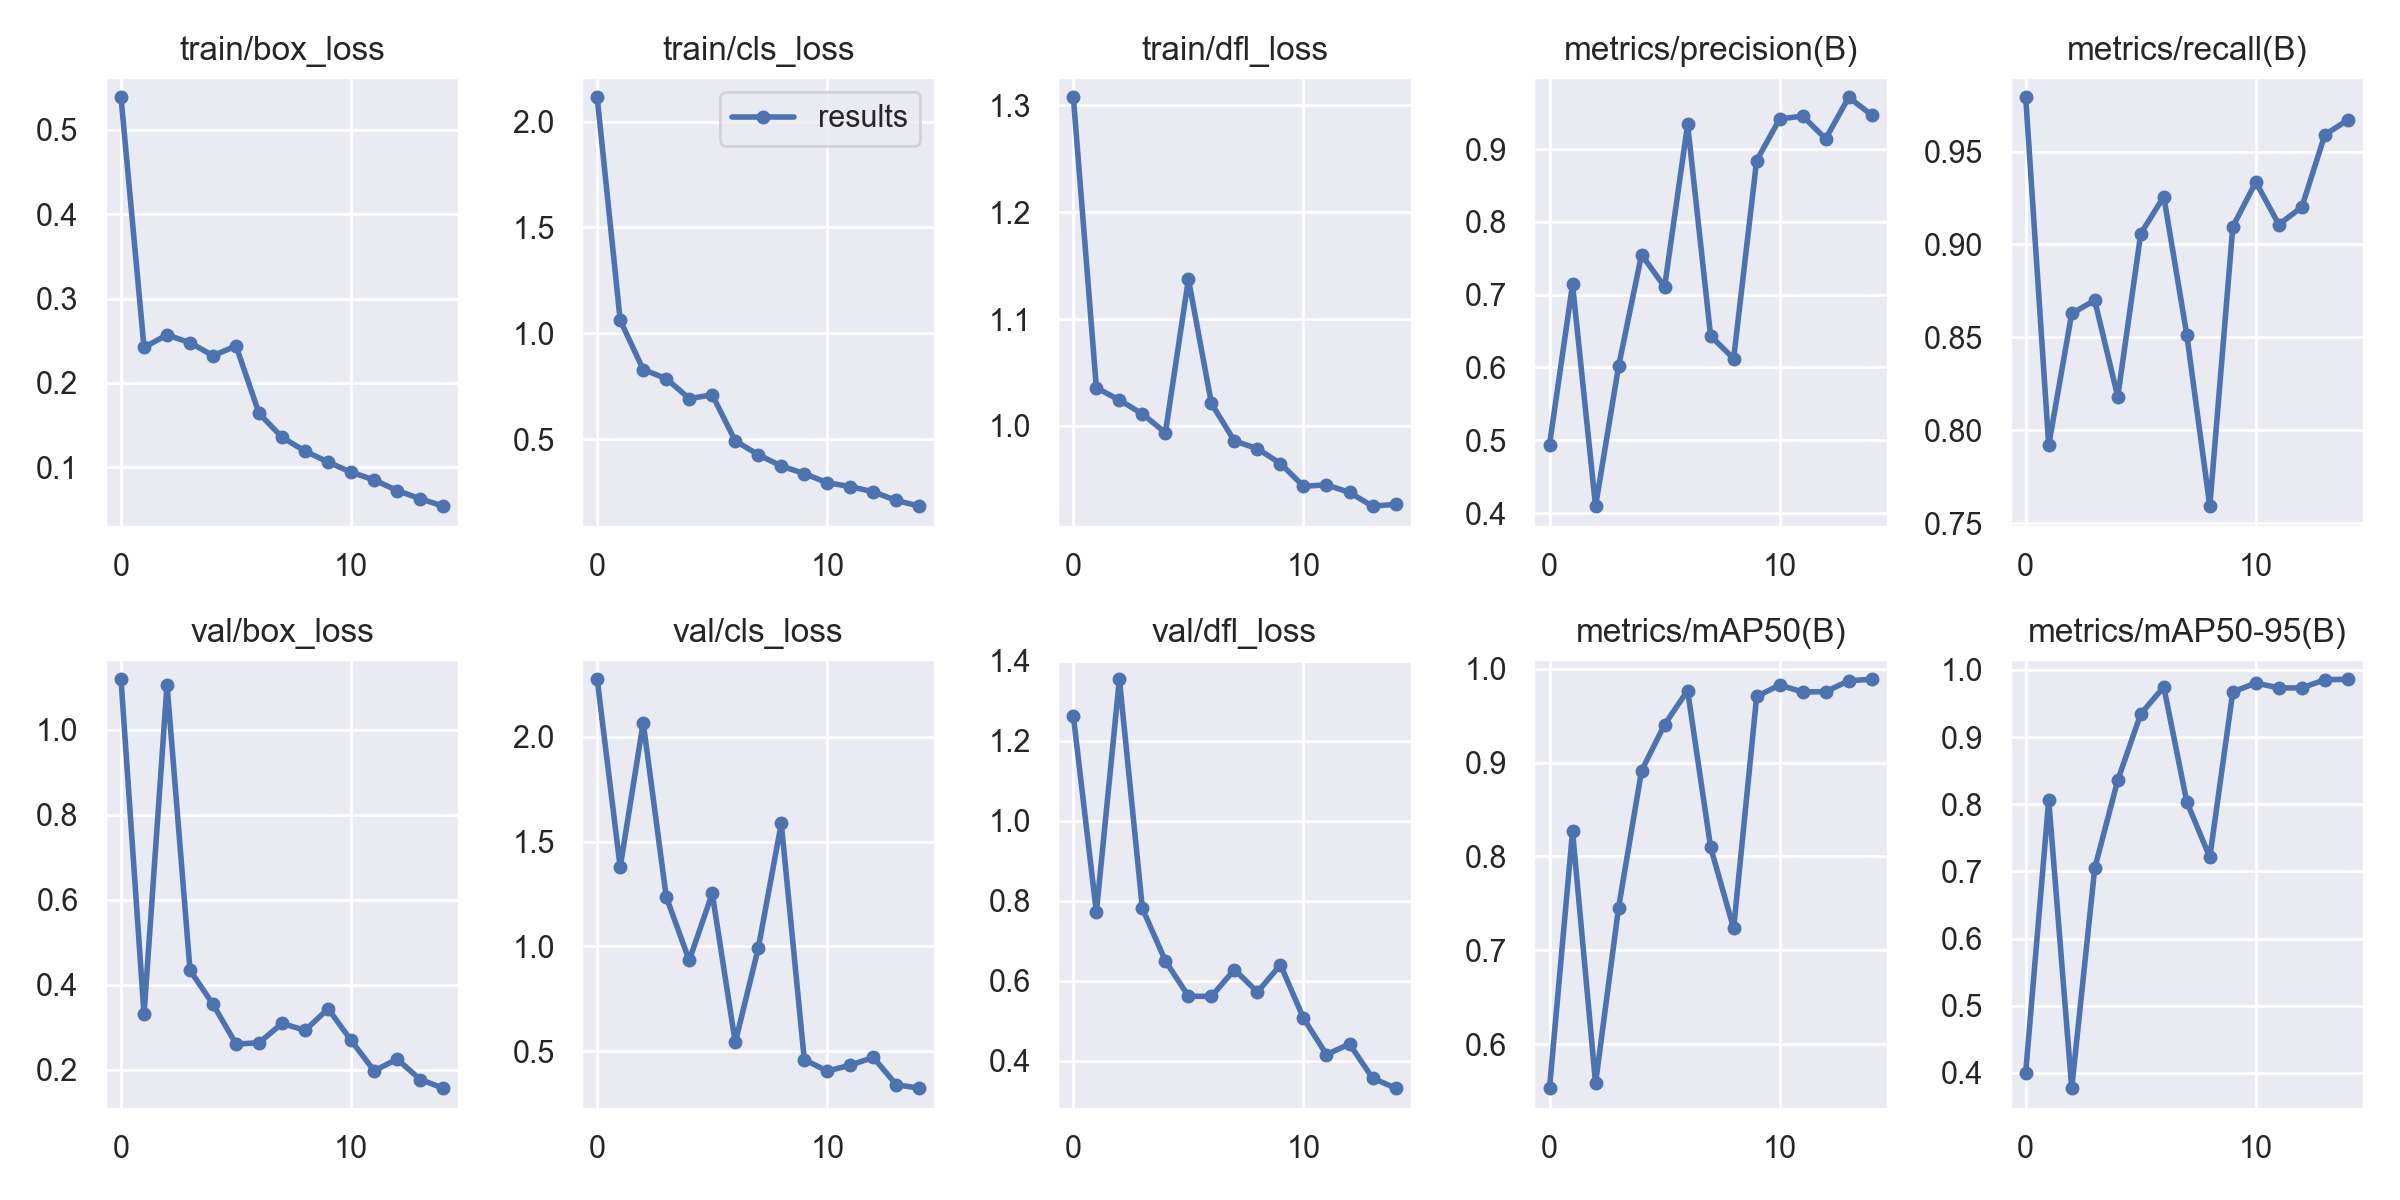

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets


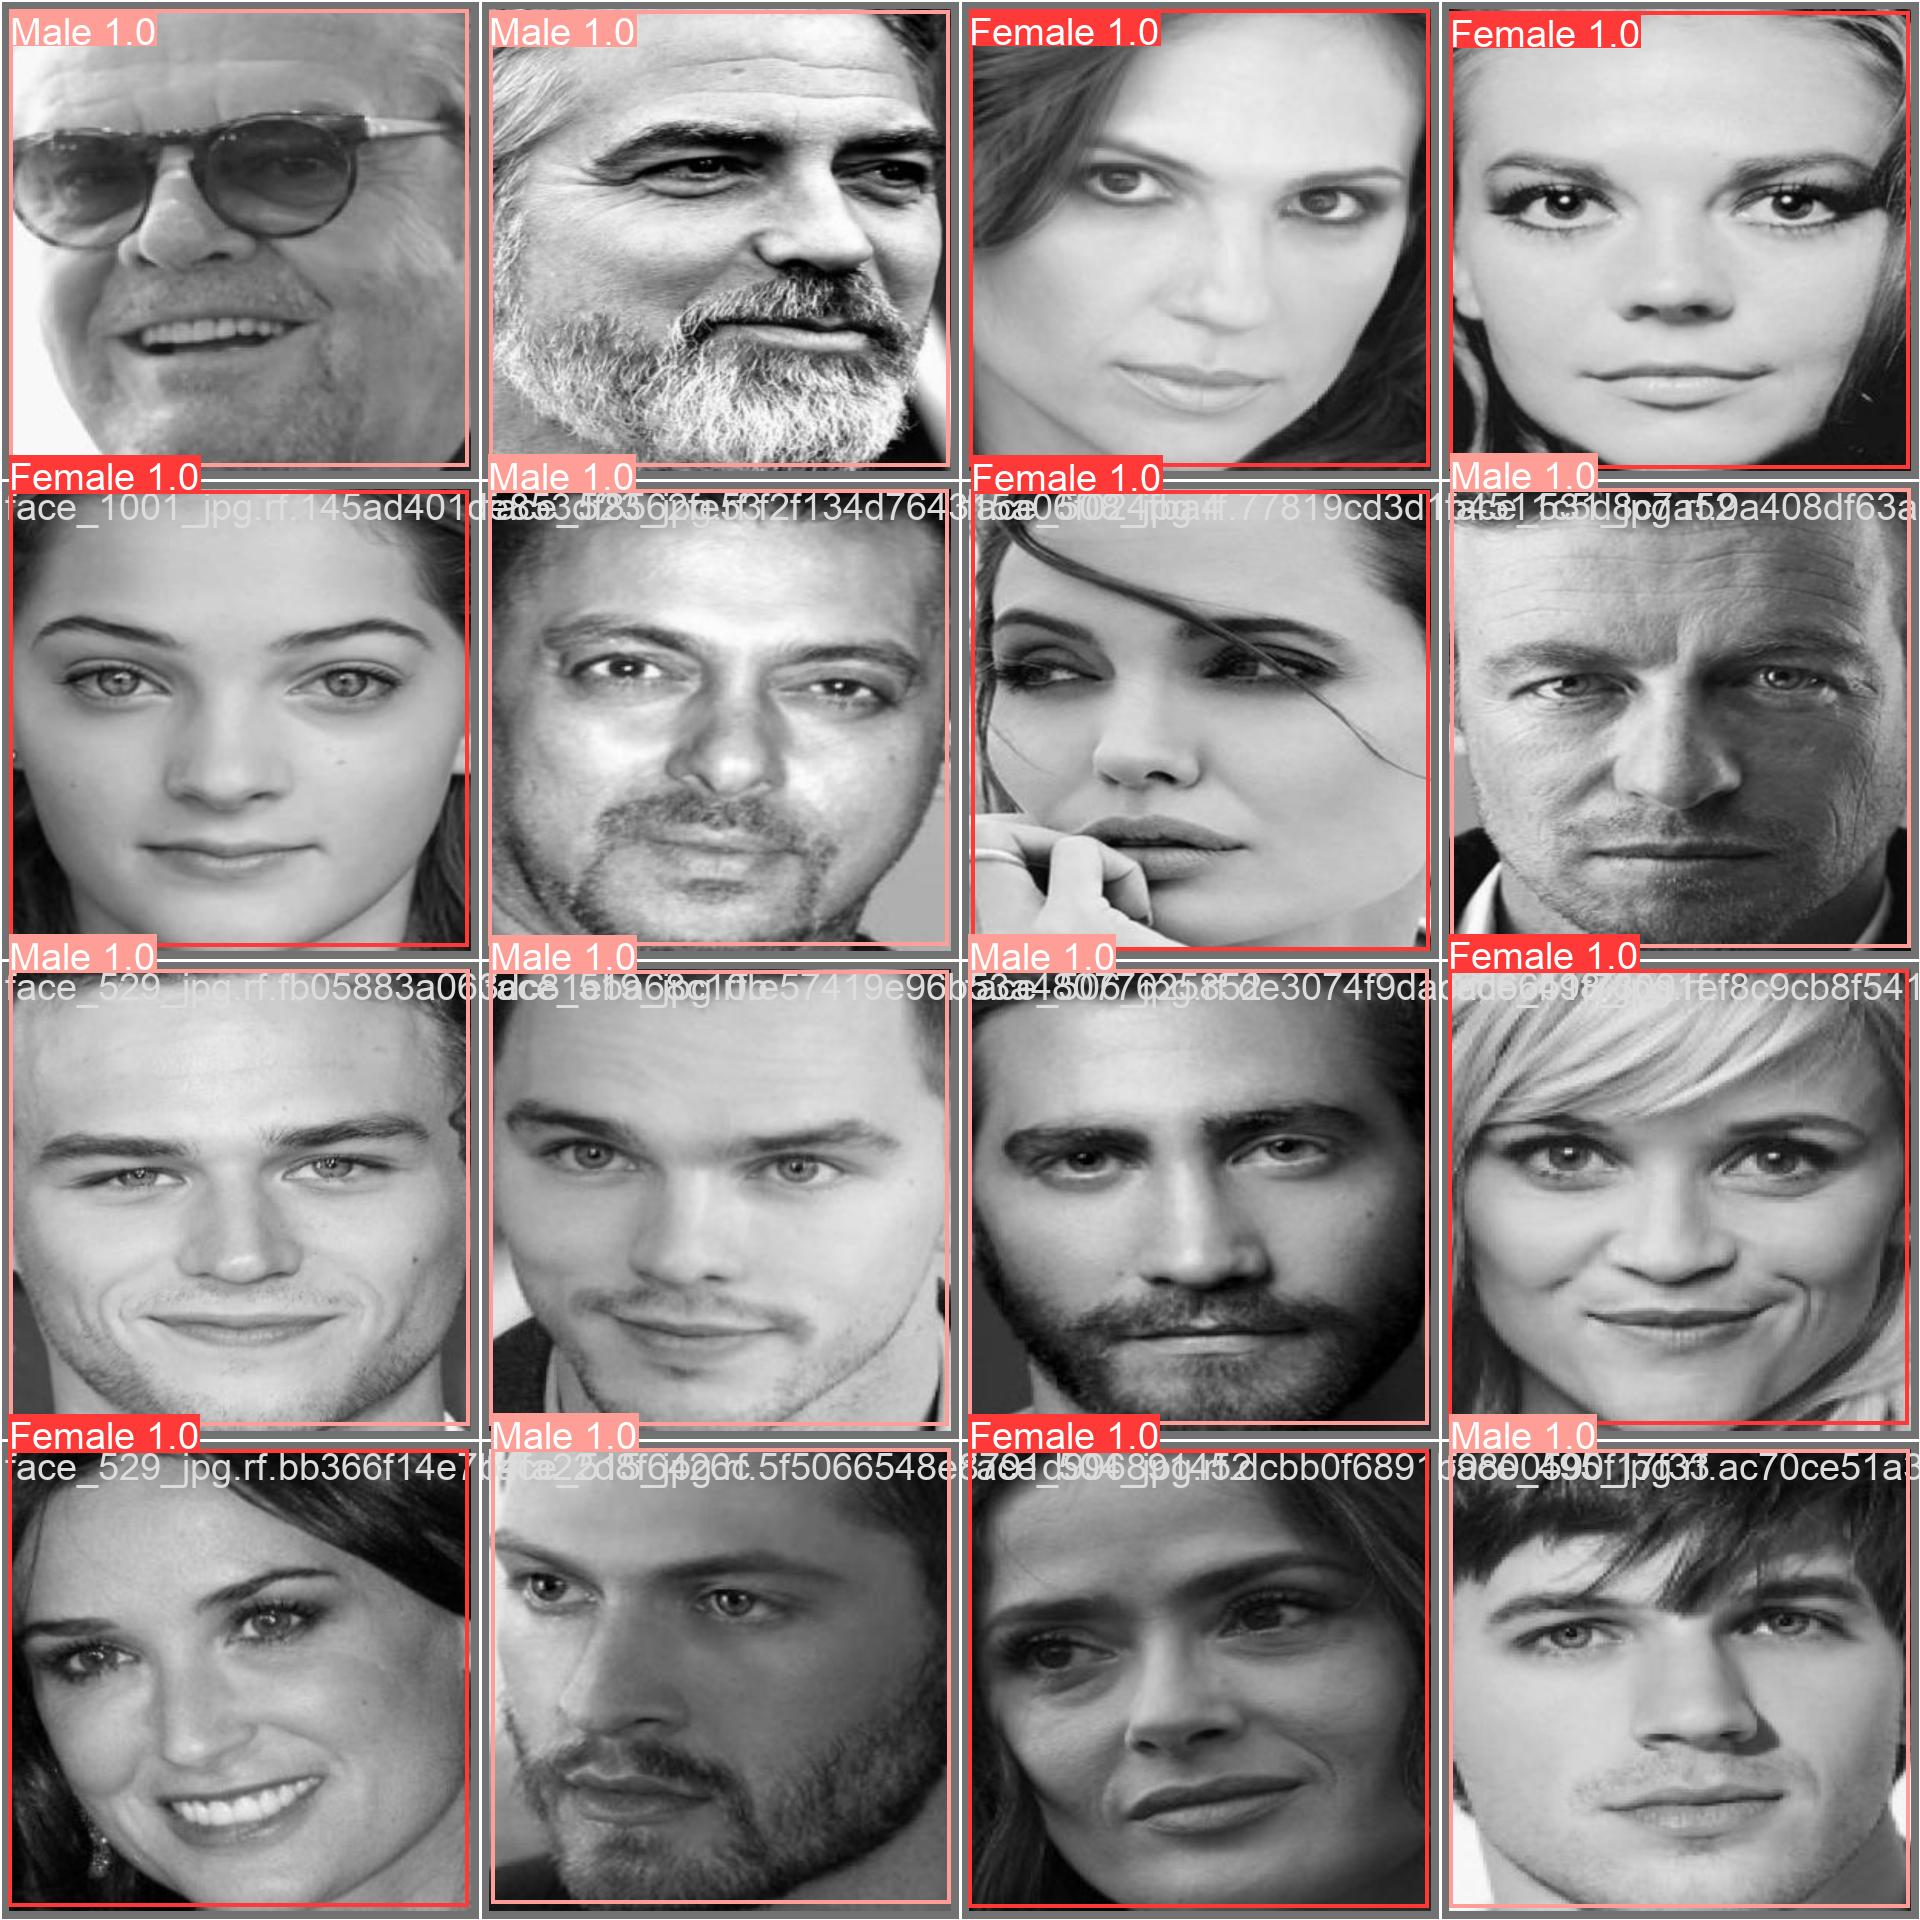

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/val_batch0_pred.jpg', width=600)

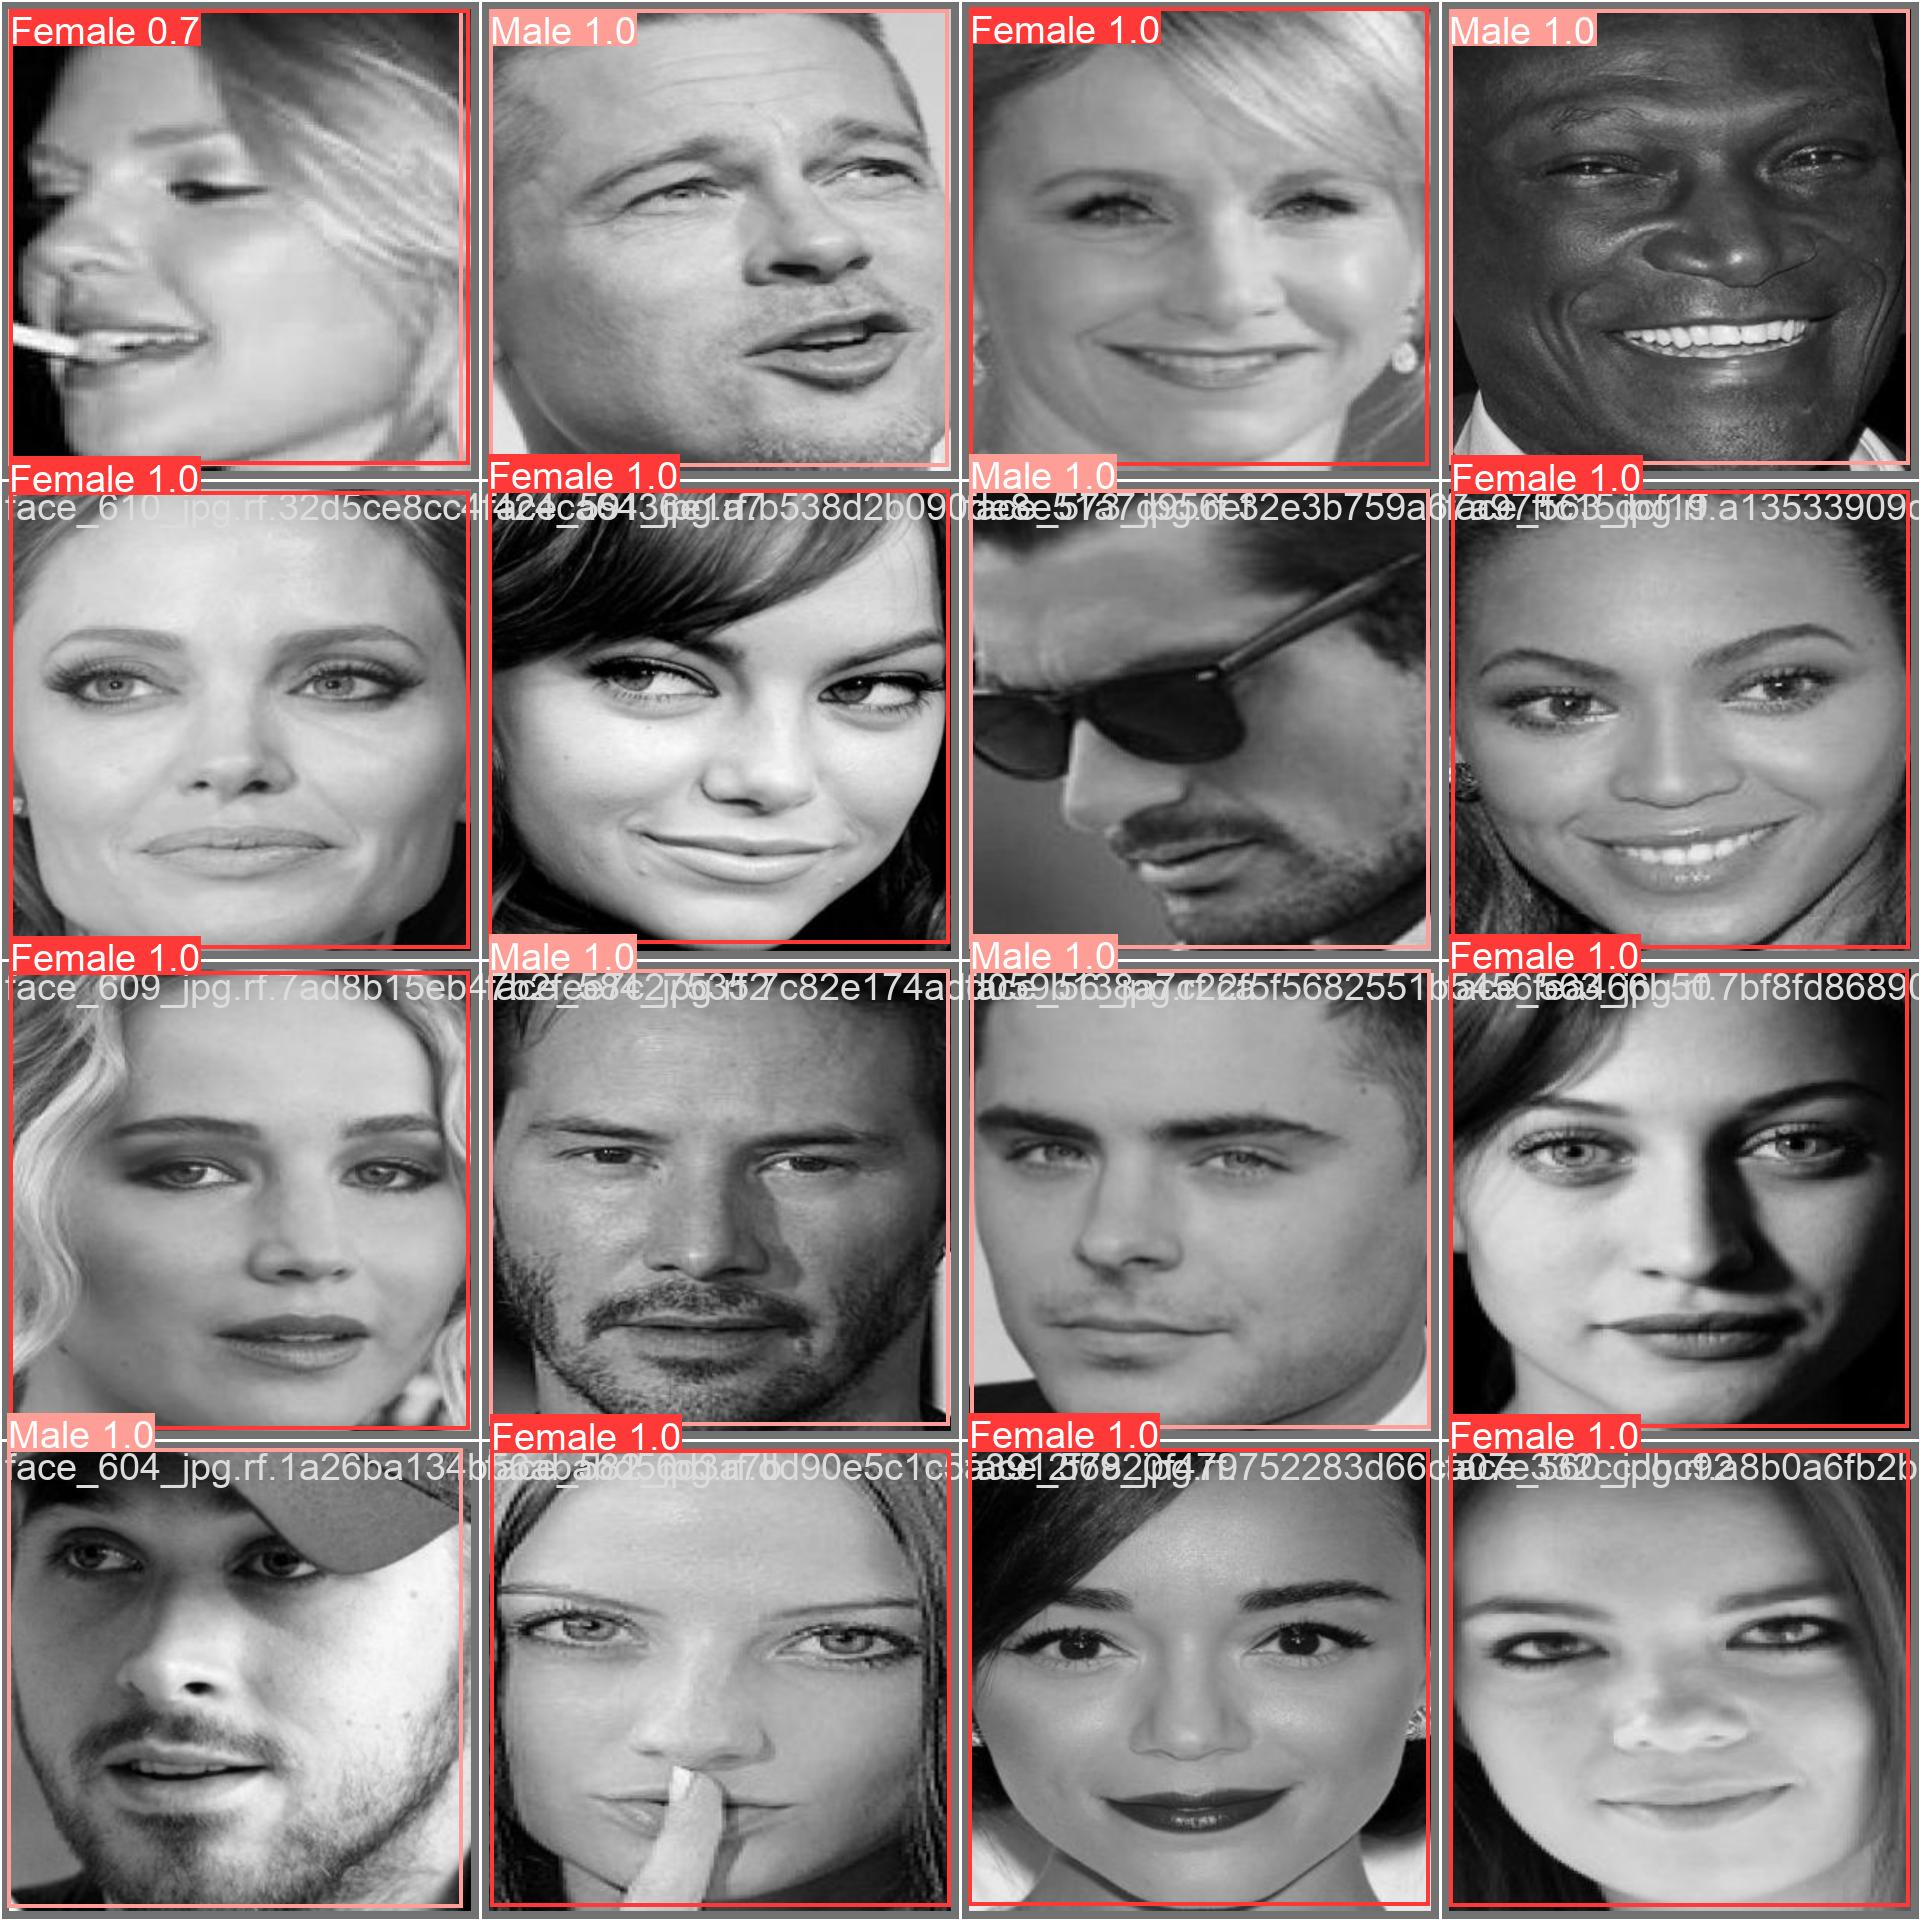

In [10]:
Image(filename=f'{HOME}/runs/detect/train5/val_batch1_pred.jpg', width=600)

# Validate custom model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train5/weights/best.pt data=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/data.yaml

/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets
WARNING ⚠️ Ultralytics settings reset to defaults. 
This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
You may view and update settings directly in '/Users/veesheenyuen/Library/Application Support/Ultralytics/settings.yaml'
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/va
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        460        460      0.947      0.967      0.989      0.986
                Female        460        237      0.946       0.97       0.99       0.99
                  Male        460        223      0.947      0.964      0.987      0.982
Speed: 1.8ms pre-process, 330.2ms inference, 0.0ms loss, 0.5ms post-process per image


# Inference with custom model

In [12]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images save=True

#!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1022_jpg.rf.2a30d2ccfb8acc40840b6d2ef468f580.jpg: 800x800 1 Male, 112.5ms
image 2/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1022_jpg.rf.e6f0112b8fe76c1e385f7622dbf9f9b8.jpg: 800x800 1 Female, 98.9ms
image 3/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1027_jpg.rf.723c1a833bfdf13d92dac0b6eaae68b6.jpg: 800x800 1 Female, 93.7ms
image 4/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_102_jpg.rf.68d8a8179c960e179fd10464795f312f.jpg: 800x800 1 Female, 94.7ms
image 5/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1035_jpg.rf.75323ae3fe1461a527a96c7616eec7ad.j

image 49/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_130_jpg.rf.f9c88809f3ec3aff638dbcebb13544a0.jpg: 800x800 1 Female, 99.4ms
image 50/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1315_jpg.rf.176603a08fface9f4f0169cd3029f0e8.jpg: 800x800 1 Male, 101.1ms
image 51/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1317_jpg.rf.15cd0b98cb76f35d5d99c9ab4a0f6cf8.jpg: 800x800 1 Female, 102.7ms
image 52/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1317_jpg.rf.fb4def87a814e41c5cb7afb15a6d0200.jpg: 800x800 1 Male, 104.5ms
image 53/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_132_jpg.rf.a9454d181d648f1c7a6e643f3ffac0f8.jpg: 800x800 1 Female, 100.5ms
image 54/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_1331_jpg.rf.a6852718f01a33ee822023c593fd9ea0.jpg: 800x800 1 Mal

image 98/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_261_jpg.rf.24cc183226f6f6411b4a370b04c44f0b.jpg: 800x800 1 Female, 96.8ms
image 99/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_278_jpg.rf.fb542e62f368c7cddb075dd7e285be1f.jpg: 800x800 1 Female, 97.2ms
image 100/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_282_jpg.rf.38749dcadf555aef6e4365ce2a96a54c.jpg: 800x800 1 Female, 98.2ms
image 101/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_286_jpg.rf.5ee5fe476a91956c89bc1f1157635b65.jpg: 800x800 1 Female, 98.0ms
image 102/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_289_jpg.rf.3ee9c1cb77cfe7d6629ca0a2bb6dac04.jpg: 800x800 1 Female, 1 Male, 97.6ms
image 103/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_290_jpg.rf.f1b47f70c76d698c50789ea36dc7811a.jpg: 800x8

image 147/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_547_jpg.rf.b3b08917d42fd2c1c2b8ad9f3d4c1146.jpg: 800x800 1 Female, 97.7ms
image 148/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_557_jpg.rf.924007f160fd2e28788f03698d68af3e.jpg: 800x800 1 Female, 1 Male, 99.5ms
image 149/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_55_jpg.rf.90b648ed4867b39aa51f5217d7d5ae67.jpg: 800x800 1 Female, 1 Male, 97.4ms
image 150/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_560_jpg.rf.0e7da08cdf62c41833e587124a830476.jpg: 800x800 1 Male, 97.7ms
image 151/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_561_jpg.rf.057ebbb9f87bffaf29307aa9b5179f94.jpg: 800x800 1 Female, 98.8ms
image 152/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_573_jpg.rf.7f7bd9123d7b54436f50630b9162542e.jpg

image 196/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_80_jpg.rf.6ee1384e9dca68c899ffe3df4821f15e.jpg: 800x800 1 Male, 100.2ms
image 197/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_812_jpg.rf.9ca2939f330c91e9e20b7cddd3c01ab9.jpg: 800x800 1 Female, 98.0ms
image 198/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_816_jpg.rf.67fe01c9f263889dfb59e9085ccc6c1e.jpg: 800x800 1 Male, 97.9ms
image 199/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_818_jpg.rf.d2c89aaacb5b2e3e2eceabacbf596f9f.jpg: 800x800 1 Male, 97.3ms
image 200/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_825_jpg.rf.1ed8d2fe215b785222361e6002e3db7e.jpg: 800x800 1 Female, 95.8ms
image 201/231 /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders/test/images/face_833_jpg.rf.346d75354a52cfb635b88f85ff5cea32.jpg: 800x800 1 Female,

# Inference results

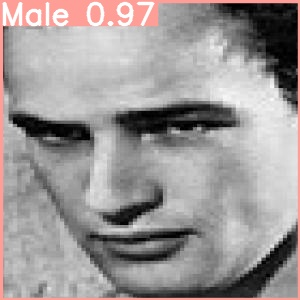

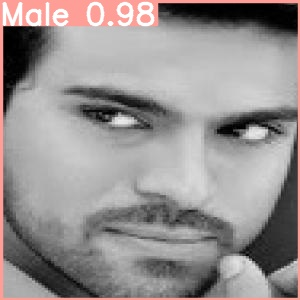

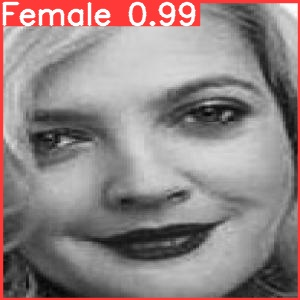

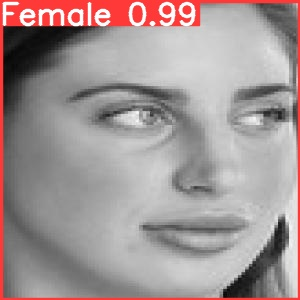

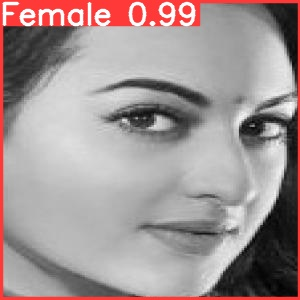

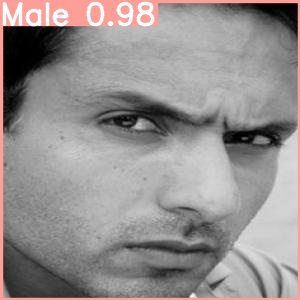

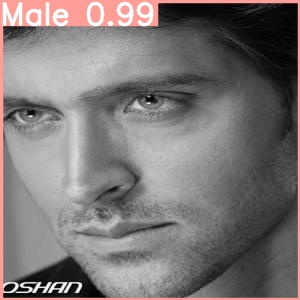

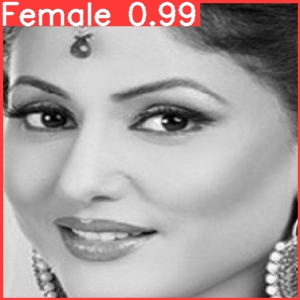

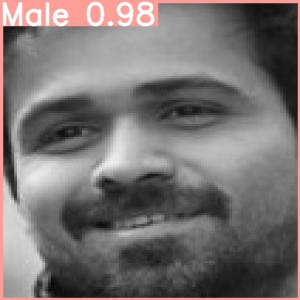

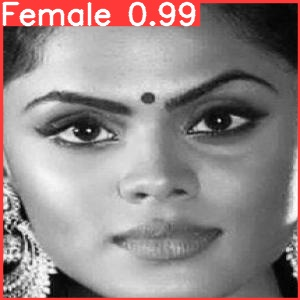

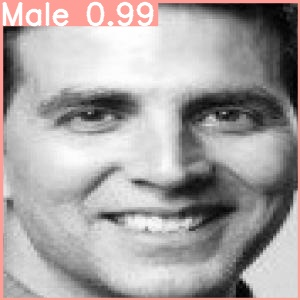

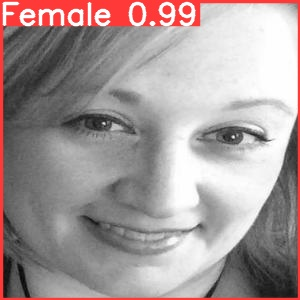

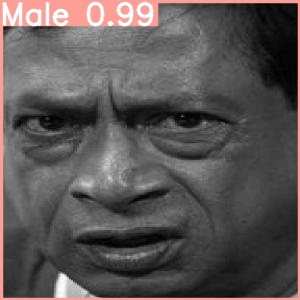

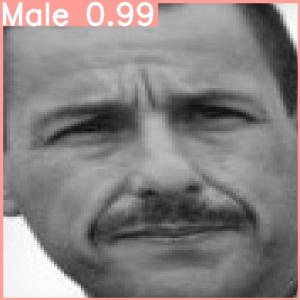

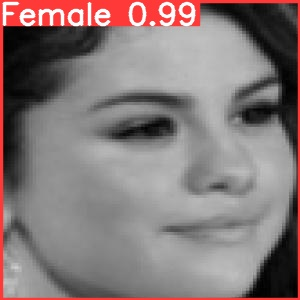

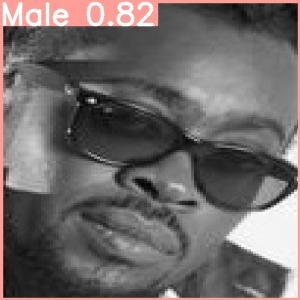

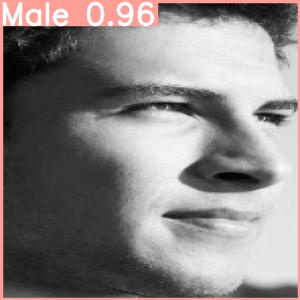

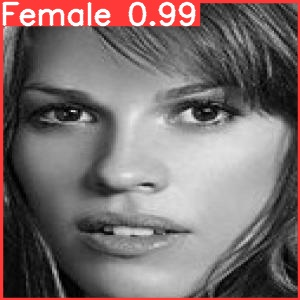

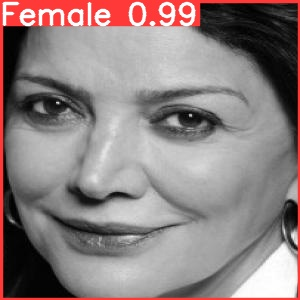

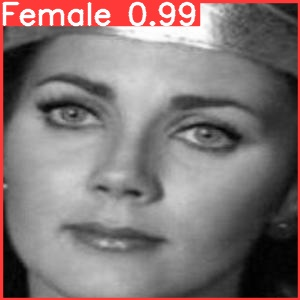

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Deploy model

In [9]:
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [8]:
!yolo export model={HOME}/runs/detect/train5/weights/best.pt format=torchscript


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.pt with output shape (1, 6, 13125) (6.0 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 0.8s, saved as /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript (11.9 MB)

Export complete (1.1s)
Results saved to /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights
Predict:         yolo task=detect mode=predict model=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript -WARNING ⚠️ not yet s